## Final Project!

In [141]:
## import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fire_incident = pd.read_csv('pittsburgh_fire_incidents.csv')
neighborhood_area = pd.read_csv('Neighborhood.csv')

sortedarea = neighborhood_area.sort_values(by = "hood")
sortedareadf = sortedarea[['hood','acres']]
newsortedareadf = sortedareadf.reset_index(drop=True)
newsortedareadf

Carrick                      255
Squirrel Hill South          225
Central Business District    225
South Side Flats             219
Hazelwood                    213
                            ... 
St. Clair                     11
East Carnegie                 10
Mt. Oliver                    10
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [179]:
## find where most fire incidents occured
new_df = fire_incident.sort_values(["neighborhood"], ascending=True)
fire_incident['neighborhood'].value_counts()

newdf =fire_incident['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
sorteddf = newdf.sort_values(["neighborhood"], ascending=True)
sortednew = sorteddf.reset_index(drop=True)
mergesorteddata = sortednew.merge(newsortedareadf, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
mergesorteddata.sort_values(['frequency'], ascending=True)
mergesorteddata['result'] = mergesorteddata['acres'] / mergesorteddata['frequency']
finalresult = mergesorteddata.sort_values(["result"], ascending=True)
finalresult

,neighborhood,frequency,hood,acres,result
60,Perry North,100,Perry North,0.000,0.000000
46,Lincoln-Lemington-Belmar,172,Lincoln-Lemington-Belmar,180.105,1.047122
49,Marshall-Shadeland,119,Marshall-Shadeland,148.209,1.245454
43,Knoxville,146,Knoxville,193.982,1.328644
25,East Allegheny,111,East Allegheny,151.705,1.366712
...,...,...,...,...,...
81,Swisshelm Park,15,Swisshelm Park,308.575,20.571667
54,New Homestead,20,New Homestead,510.728,25.536400
31,Fairywood,23,Fairywood,622.746,27.075913
26,East Carnegie,10,East Carnegie,277.895,27.789500


In [59]:
## find where the least fire incidents occured.
fire_incident['neighborhood'].value_counts().idxmin()

'Mount Oliver Borough'

In [4]:
fire_incident.groupby('neighborhood').count()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,53,52,53,53,52,53,53,52,53,53,53,53,53,53,53,51,51
Allegheny West,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,36,36
Allentown,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,112,112
Arlington,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Arlington Heights,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
West End,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
West Oakland,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55


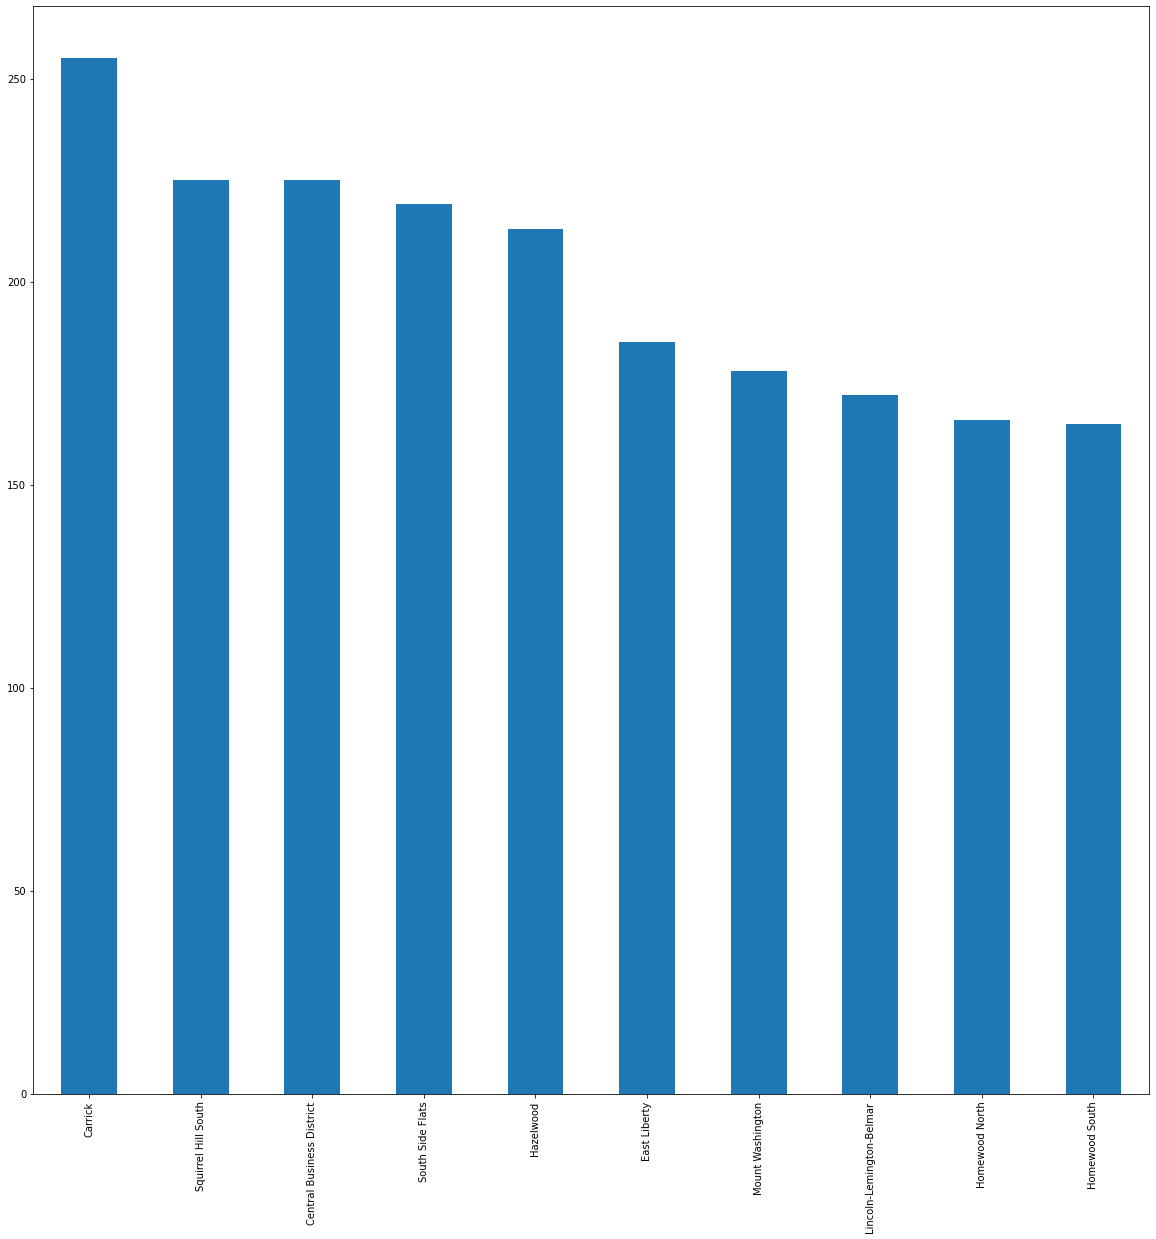

In [5]:
## analyze the frequency by bar plot
fire_incident['neighborhood'].value_counts().head(10).plot.bar(figsize=(20, 20))

## I decide to use both dataframe and barplot to display the frequency of fire incidents of different area, so we are not just know which area has the most/least fire incidents, but also compare with other area. The bar plot helps us to have a intuitive view.

In [ ]:

area = neighborhood_area["acres"]
fire incident = 